## Assessing the Impact of Three-Child Policy on China Dependency Ratio

Wenjun Rao (71672380) & Rachel Yang (57893471)


### Background

China, the world's most populous nation, has long grappled with the challenges and opportunities presented by its vast population. In response to the aging population and evolving societal needs, the Chinese government has implemented a series of policies to regulate its population growth. The most recent of these policies, the "Three-Child Policy," introduced on May 31st, 2021, allowing each family to have up to three children, marks a significant shift in the country's approach to population control. As the world watches with interest, questions about the efficacy of this policy have begun to emerge.  

The Three-Child Policy comes at a pivotal moment for China, as the nation faces a rapidly aging population, imbalanced gender ratios, and socio-economic challenges. The outcomes of the Three-Child Policy could significantly impact the future of the world's most populous nation and have far-reaching consequences on a global scale. This project aims to provide an in-depth evaluation of the policy's potential effects on children dependency ratio and elderly dependency ratio.

### General Strategy

We plan to utilize data spanning from 2016 to 2022 obtained from the National Bureau of Statistics of China to derive impact of the Three-Child Policy. Our focus will be on two dependent variables—the children's dependency ratio and the elderly dependency ratio.

To analyze the impact of the Three-Child Policy, we will employ three distinct strategies: Ordinary Least Squares, Lasso Regression, and Random Forest. Subsequently, we aim to compare the outcomes generated by these methods to assess the policy's effects and determine the precision of each approach in terms of prediction in this context.

### Import

First, we start by importing the Python packages that contain all necessary functions for our analysis.

In [25]:
! pip install geopandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import (
    linear_model, metrics, model_selection
)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from itertools import cycle
import patsy
import json
import gc
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Dataset

All data were obtained from the National Bureau of Statistics of China and manually compiled for this analysis. The following features were used:

- **total_pop:** Total population at the end of the year, expressed in units of 10,000 persons.
- **urban_pop:** Urban population at the end of the year, expressed in units of 10,000 persons.
- **urban_proportion:** The percentage of urban population to total population.
- **rural_pop:** Rural population at the end of the year, expressed in units of 10,000 persons.
- **rural_proportion:** The percentage of rural population to total population.
- **birth:** The birth rate, expressed in permille (‰), the number of live births per 1,000 individuals in the total population.
- **death:** The death rate, expressed in permille (‰), the number of deaths per 1,000 individuals in the total population.
- **natural_growth:** The natural growth rate, calculated as the difference between the birth rate and the death rate.
- **sex:** The sex ratio, where the number of females is fixed at 100, and the number of males is compared to this baseline.
- **never_married:** The percentage of the population over the age of 15 who have never been married.
- **dependency_young:** The children dependency ratio, calculated as the percentage of the population aged 0-14 years to the working-age population, defined as those aged 15-64 years.
- **dependency_old:** The elderly dependency ratio, calculated as the percentage of the population aged 65+ years to the working-age population, defined as those aged 15-64 years.
- **Illiteracy:** The percentage of the population over the age of 15 who are illiterate.
- **GRP:** Gross Regional Product.
- **unemployment:** The population that is unemployed in the labor force, expressed in units of 10,000 persons.
- **CPI:** The Consumer Price Index, which normalizes the index to the previous year, set at 100.
- **policy:** A binary variable which equals 1 if year is in 2021 or 2022, 0 otherwise.

In [26]:
# Load the data from my github
url = "https://raw.githubusercontent.com/yarach71/Econ-323-Final-Project/main/Econ323_Data.csv"
pop_raw = pd.read_csv(url)
pop_raw.head()

Year          Region  Total Population\n(year-end)\n(10 000 persons)  \
0  2022         Beijing                                          2184.0   
1  2022         Tianjin                                          1363.0   
2  2022           Hebei                                          7420.0   
3  2022          Shanxi                                          3481.0   
4  2022  Inner Mongolia                                          2401.0   

   Urban Population  Urban Population Proportion (%)  Rural Population  \
0            1913.0                            87.57             271.0   
1            1160.0                            85.11             203.0   
2            4575.0                            61.65            2845.0   
3            2226.0                            63.96            1255.0   
4            1647.0                            68.60             754.0   

   Rural Population Proportion (%)  Birth Rate\n(‰)  Death Rate\n(‰)  \
0                            12.43             5.67             5.72   
1                            14.89             4.75             6.43   
2                            38.35             6.09             7.80   
3                            36.04             6.75             7.73   
4                            31.40             5.58             7.83   

   Natural\nGrowth Rate\n(‰)  Sex Ratio\n(Female=100)  \
0                      -0.05                   104.18   
1                      -1.68                   105.01   
2                      -1.71                    98.77   
3                      -0.98                   104.37   
4                      -2.25                   104.11   

   Never\nMarried (%)above 15 years old  Children\nDependency\nRatio  \
0                                 21.06                        16.57   
1                                 18.46                        18.51   
2                                 16.54                        28.22   
3                                 18.70                        21.99   
4                                 15.75                        18.45   

   Dependency\nRatio  \
0              20.76   
1              24.28   
2              23.77   
3              20.66   
4              20.40   

   Percentage\nof Illiterate\nPopulation to\nTotal Aged 15\nand Over(%)  \
0                                               0.84                      
1                                               1.65                      
2                                               2.18                      
3                                               1.73                      
4                                               3.75                      

   Gross\nRegional\nProduct (100 million yuan)  Unemployment (10 000 persons)  \
0                                      41610.9                           36.4   
1                                      16311.3                           25.4   
2                                      42370.4                           20.5   
3                                      25642.6                           19.9   
4                                      23158.6                           29.0   

   CPI (Last year = 100）  
0                  101.8  
1                  101.9  
2                  101.8  
3                  102.1  
4                  101.8

In [27]:
# Rename the columns for readability and simplicity

# Simplify column names
new_column_names = {
    "Total Population\n(year-end)\n(10 000 persons)": "total_pop",
    "Urban Population": "urban_pop",
    "Urban Population Proportion (%)": "urban_proportion",
    "Rural Population": "rural_pop",
    "Rural Population Proportion (%)": "rural_proportion",
    "Birth Rate\n(‰)": "birth",
    "Death Rate\n(‰)": "death",
    "Natural\nGrowth Rate\n(‰)": "natural_growth",
    "Sex Ratio\n(Female=100)": "sex_ratio",
    "Never\nMarried (%)above 15 years old": "never_married",
    "Children\nDependency\nRatio": "dependency_young",
    "Dependency\nRatio": "dependency_old",
    "Percentage\nof Illiterate\nPopulation to\nTotal Aged 15\nand Over(%)": "Illiteracy",
    "Gross\nRegional\nProduct (100 million yuan)": "GRP",
    "Unemployment (10 000 persons)": "unemployment",
    "CPI (Last year = 100）": "CPI"
}

pop_raw.rename(columns=new_column_names, inplace=True)

In [28]:
# Add the feature 'policy'
pop_raw['policy'] = pop_raw['Year'].apply(lambda Year: 1 if Year in [2021, 2022] else 0)

# Check the shape of the dataframe
print(pop_raw.shape)

(217, 19)


In [29]:
# Rename the DataFrame
pop = pop_raw.copy()

# Check for missing values
missing_values = pop_raw.isnull().sum()

# Check data types
data_types = pop_raw.dtypes

print(missing_values, data_types)

Year                0
Region              0
total_pop           0
urban_pop           0
urban_proportion    0
rural_pop           0
rural_proportion    0
birth               0
death               0
natural_growth      0
sex_ratio           0
never_married       0
dependency_young    0
dependency_old      0
Illiteracy          0
GRP                 0
unemployment        0
CPI                 0
policy              0
dtype: int64 Year                  int64
Region               object
total_pop           float64
urban_pop           float64
urban_proportion    float64
rural_pop           float64
rural_proportion    float64
birth               float64
death               float64
natural_growth      float64
sex_ratio           float64
never_married       float64
dependency_young    float64
dependency_old      float64
Illiteracy          float64
GRP                 float64
unemployment        float64
CPI                 float64
policy                int64
dtype: object


In [30]:
# Display the first few rows of the dataframe
pop.head()

Year          Region  total_pop  urban_pop  urban_proportion  rural_pop  \
0  2022         Beijing     2184.0     1913.0             87.57      271.0   
1  2022         Tianjin     1363.0     1160.0             85.11      203.0   
2  2022           Hebei     7420.0     4575.0             61.65     2845.0   
3  2022          Shanxi     3481.0     2226.0             63.96     1255.0   
4  2022  Inner Mongolia     2401.0     1647.0             68.60      754.0   

   rural_proportion  birth  death  natural_growth  sex_ratio  never_married  \
0             12.43   5.67   5.72           -0.05     104.18          21.06   
1             14.89   4.75   6.43           -1.68     105.01          18.46   
2             38.35   6.09   7.80           -1.71      98.77          16.54   
3             36.04   6.75   7.73           -0.98     104.37          18.70   
4             31.40   5.58   7.83           -2.25     104.11          15.75   

   dependency_young  dependency_old  Illiteracy      GRP  unemployment    CPI  \
0             16.57           20.76        0.84  41610.9          36.4  101.8   
1             18.51           24.28        1.65  16311.3          25.4  101.9   
2             28.22           23.77        2.18  42370.4          20.5  101.8   
3             21.99           20.66        1.73  25642.6          19.9  102.1   
4             18.45           20.40        3.75  23158.6          29.0  101.8   

   policy  
0       1  
1       1  
2       1  
3       1  
4       1

In [31]:
# Descriptive Statistics
summary = pop.describe()
print(summary)

              Year     total_pop    urban_pop  urban_proportion    rural_pop  \
count   217.000000    217.000000   217.000000        217.000000   217.000000   
mean   2019.000000   4515.524839  2785.843917         61.557419  1729.671659   
std       2.004624   2915.195216  1880.283353         11.636978  1185.086684   
min    2016.000000    331.000000    98.000000         29.560000   203.000000   
25%    2017.000000   2475.000000  1542.000000         54.690000   899.440000   
50%    2019.000000   3874.000000  2280.000000         60.150000  1505.000000   
75%    2021.000000   6255.000000  3747.000000         67.490000  2482.000000   
max    2022.000000  12684.000000  9466.000000         89.330000  4909.000000   

       rural_proportion       birth       death  natural_growth   sex_ratio  \
count        217.000000  217.000000  217.000000      217.000000  217.000000   
mean          38.442995    9.860691    6.353410        3.507327  104.723180   
std           11.636754    3.192716    1.1

### Explore and summarize Visualization

Use box plots to summarize key variables

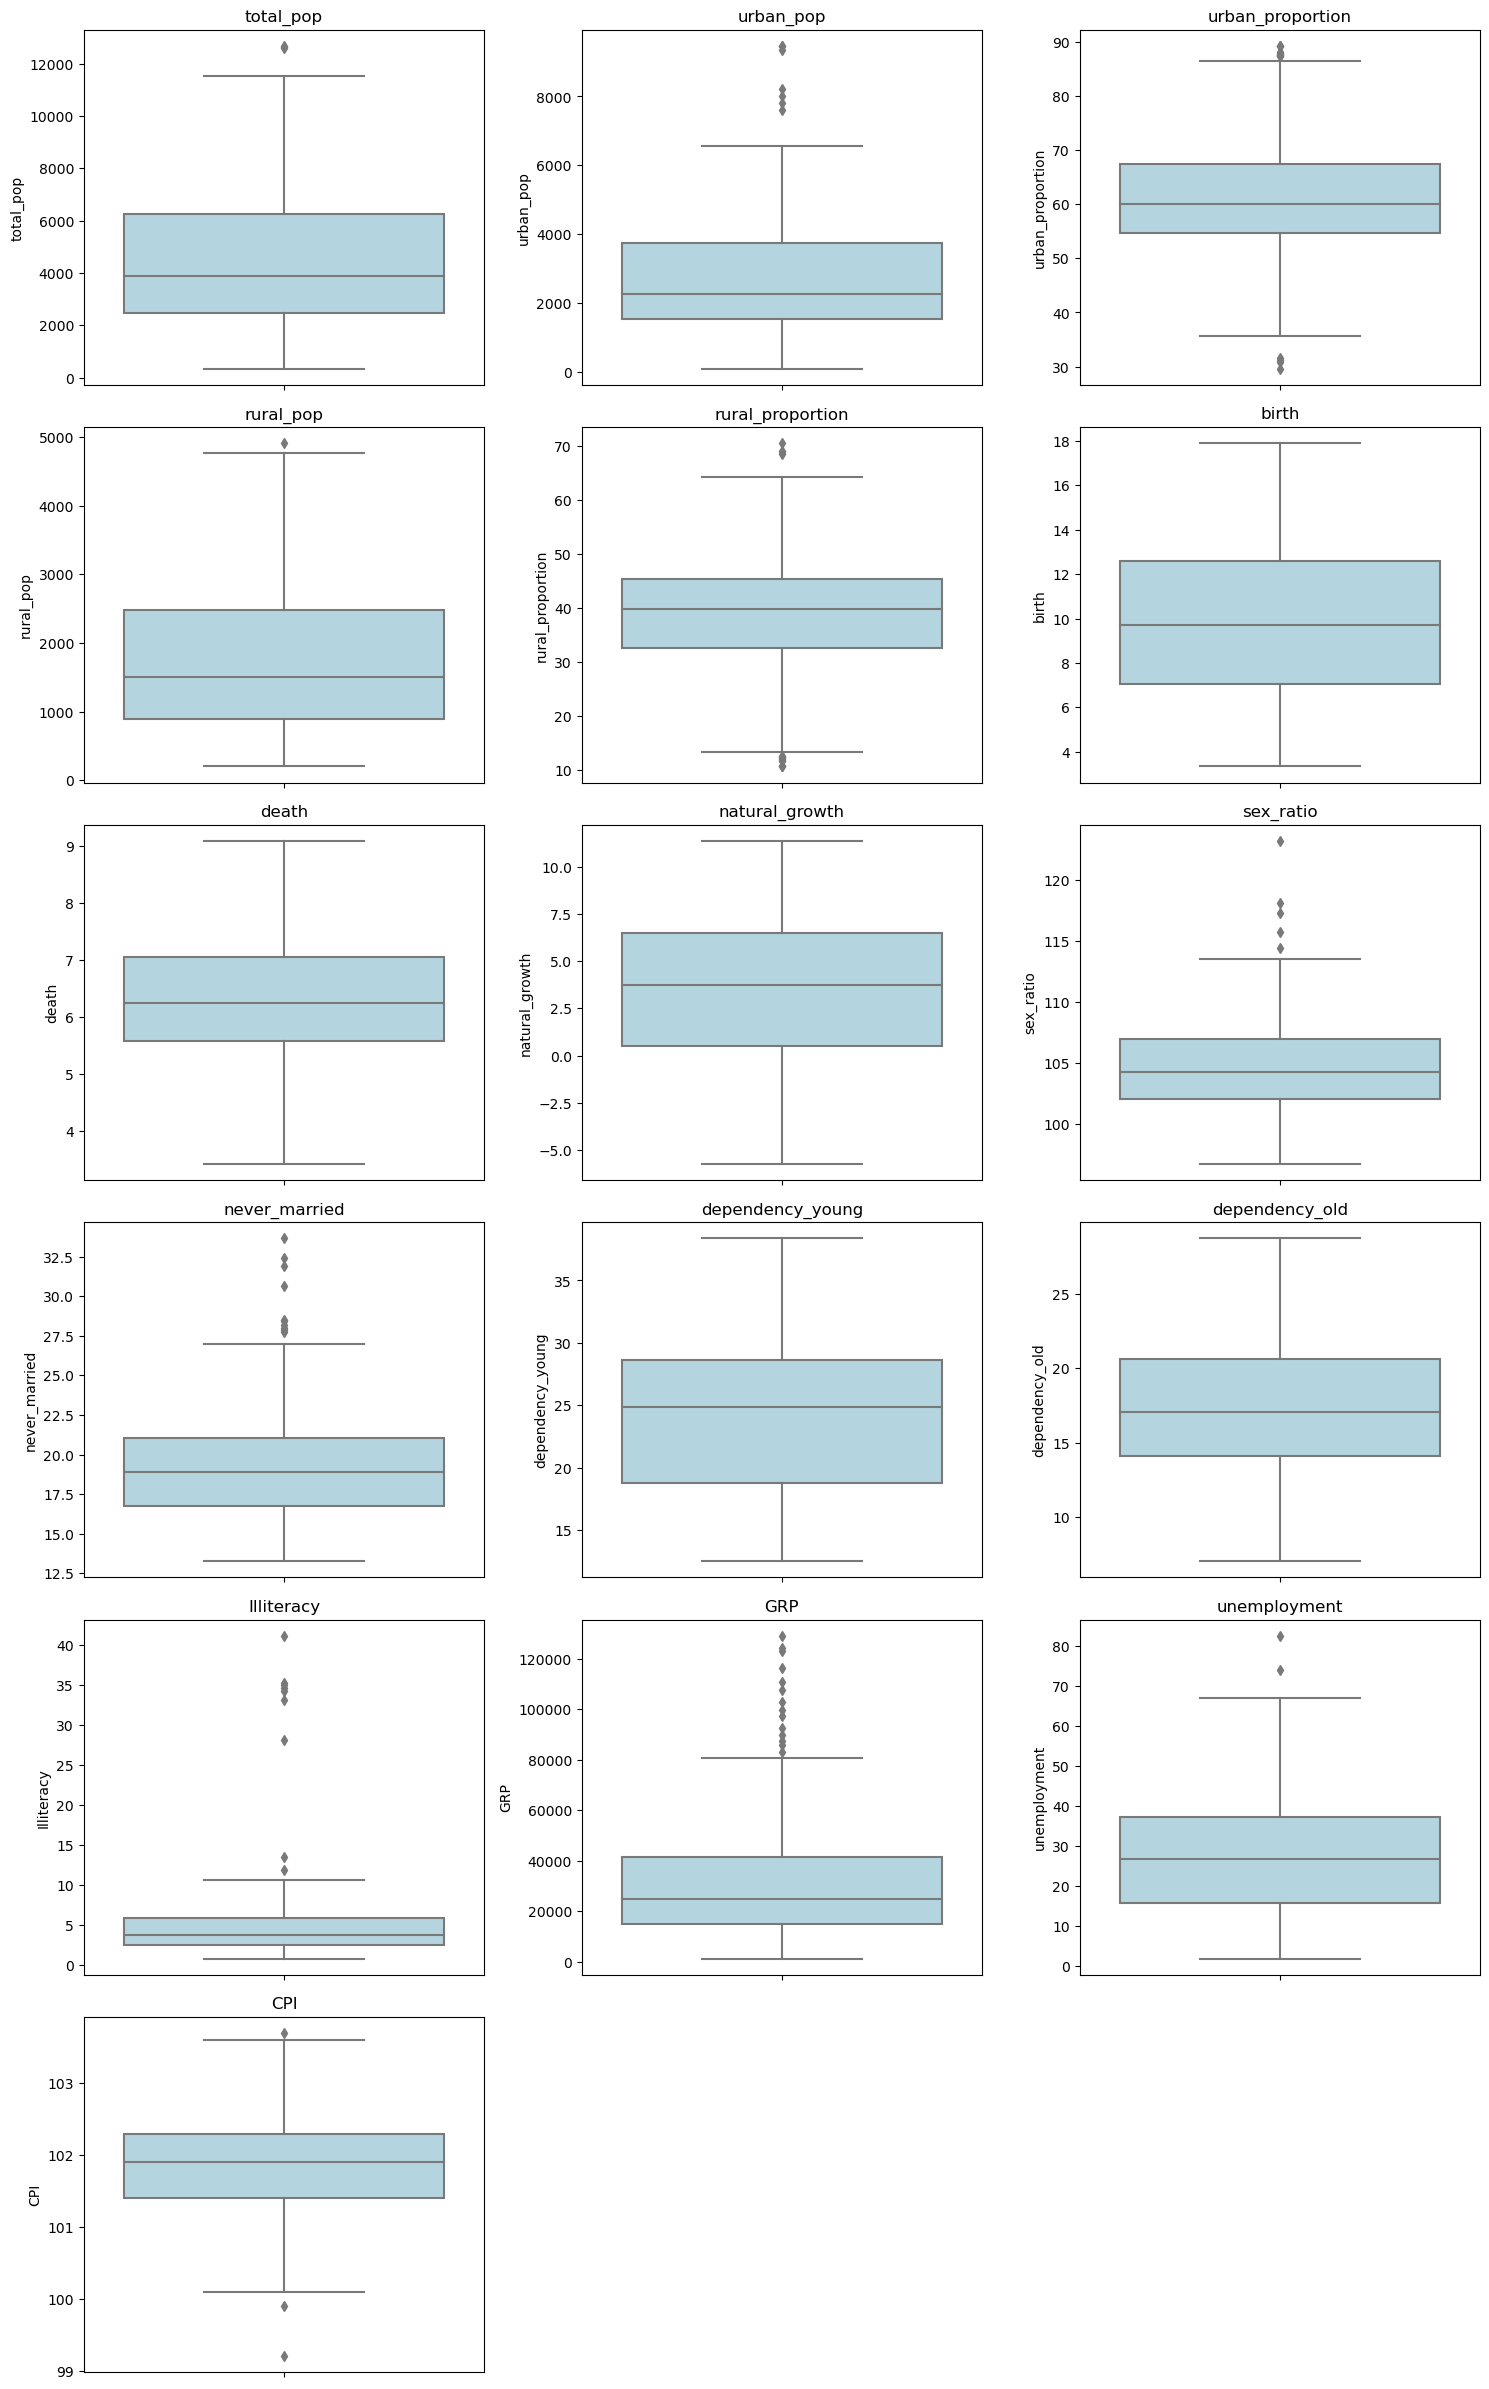

In [32]:
# Excluding 'Urban Population', 'Rural Population', 'Policy', and 'Year' for the box plots
exclude = ['Year', 'Region', 'policy']
columns_include = pop.columns.drop(exclude)

# Determine the number of rows required for the subplot grid
num_columns = len(columns_include)
num_rows = (num_columns // 3) + (num_columns % 3 > 0)

# Create a subplot grid and plot box plots for the selected numeric columns
plt.figure(figsize=(15, num_rows * 4))

for i, column in enumerate(columns_include, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(y=pop[column], color='lightblue') 
    plt.title(column)

plt.tight_layout()
plt.show()

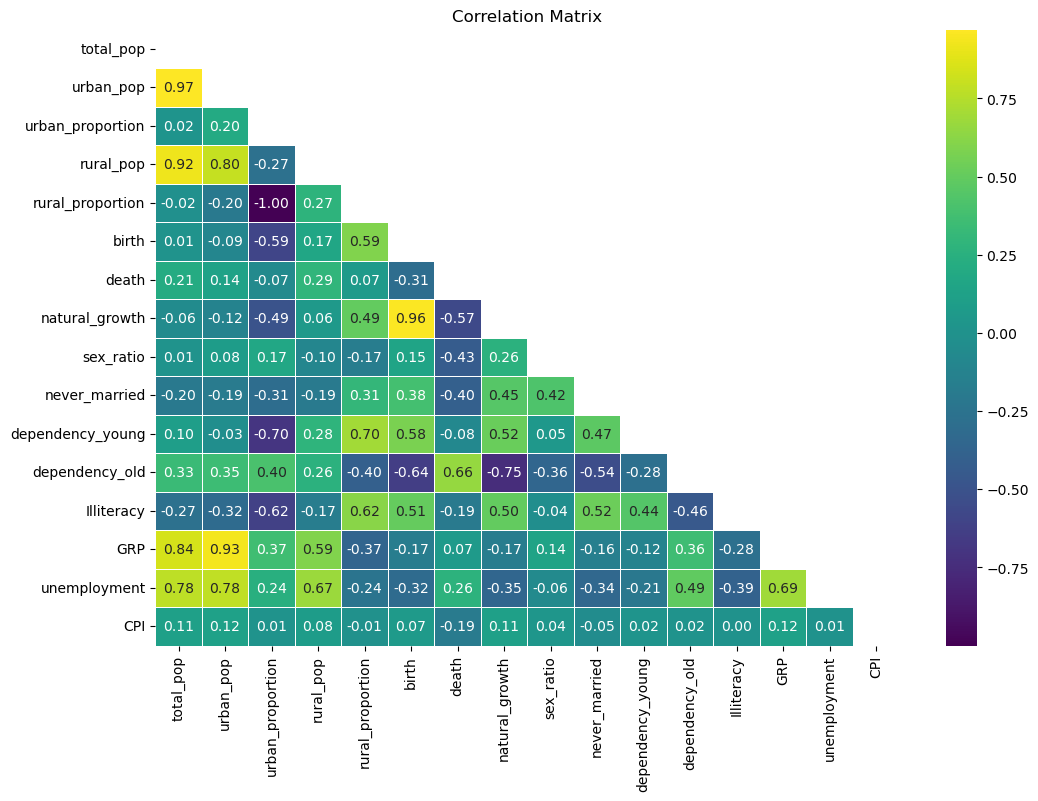

In [33]:
# Heatmap of the correlation matrix
correlation_matrix = pop[columns_include].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Creating the heatmap with the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

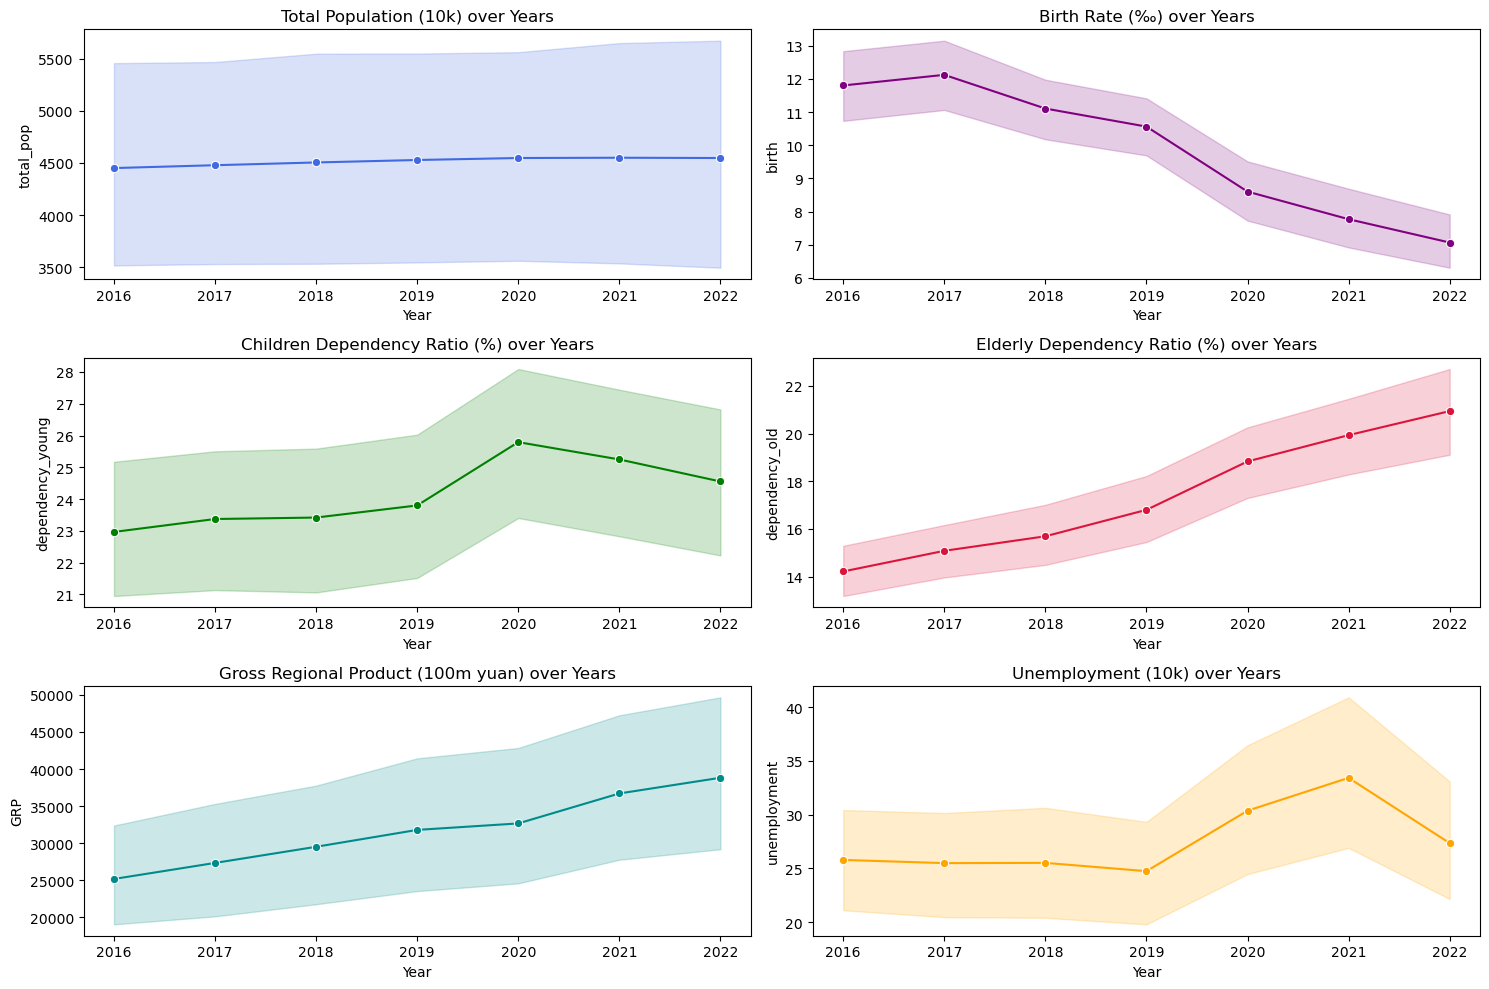

In [34]:
# Plotting the trends 
plt.figure(figsize=(15, 10))

# Total Population
plt.subplot(3, 2, 1)
sns.lineplot(x='Year', y='total_pop', data=pop, marker='o', color='royalblue')
plt.title('Total Population (10k) over Years')

# Birth Rate
plt.subplot(3, 2, 2)
sns.lineplot(x='Year', y='birth', data=pop, marker='o', color='purple')
plt.title('Birth Rate (‰) over Years')

# Children Dependency Ratio
plt.subplot(3, 2, 3)
sns.lineplot(x='Year', y='dependency_young', data=pop, marker='o', color='green')
plt.title('Children Dependency Ratio (%) over Years')

# Elderly Dependency Ratio
plt.subplot(3, 2, 4)
sns.lineplot(x='Year', y='dependency_old', data=pop, marker='o', color='crimson')
plt.title('Elderly Dependency Ratio (%) over Years')

# GRP
plt.subplot(3, 2, 5)
sns.lineplot(x='Year', y='GRP', data=pop, marker='o', color='darkcyan')
plt.title('Gross Regional Product (100m yuan) over Years')

# Unemployment
plt.subplot(3, 2, 6)
sns.lineplot(x='Year', y='unemployment', data=pop, marker='o', color='orange')
plt.title('Unemployment (10k) over Years')

plt.tight_layout()
plt.show()

Examining the graphs provided, a consistent horizontal trend is observed for Total Population over the years. Gross Regional Product and Elderly Dependency Ratio exhibit an increasing pattern. The Birth Rate demonstrates a continuous decline. The Children Dependency Ratio showed an upward trajectory until 2020, after which it began to decrease. The Unemployment Rate remained relatively stable until 2019 when it started to rise, but it began decreasing from 2021 onwards.

To provide a visualization of the population in each region, we plot a map of China where the colors of the regions indicate the average population of each region from 2016 to 2022. Clicking on the graph will allow you to view the total population data for each region. The shapefile of the map is obtained from [University of Texas Libraries GeoData](https://geodata.lib.utexas.edu).

In [35]:
# Load the shapefile and only keep region name and geometry columns
china_shapefile = gpd.read_file('stanford-bw669kf8724-shapefile-3', 
                                usecols=['name_1', 'geometry'])
# Check Region name
region_name = china_shapefile['name_1'].unique()
print(region_name)

# Change the naming of region so that it is the same as our pop dataframe
china_shapefile['name_1'] = china_shapefile['name_1'].replace({'Xinjiang Uygur': 'Xinjiang',
                                                               'Xizang': 'Tibet',
                                                               'Nei Mongol': 'Inner Mongolia',
                                                               'Ningxia Hui':'Ningxia'})

['Anhui' 'Beijing' 'Chongqing' 'Fujian' 'Gansu' 'Guangdong' 'Guangxi'
 'Guizhou' 'Hainan' 'Hebei' 'Heilongjiang' 'Henan' 'Hubei' 'Hunan'
 'Jiangsu' 'Jiangxi' 'Jilin' 'Liaoning' 'Nei Mongol' 'Ningxia Hui'
 'Qinghai' 'Shaanxi' 'Shandong' 'Shanghai' 'Shanxi' 'Sichuan' 'Tianjin'
 'Xinjiang Uygur' 'Xizang' 'Yunnan' 'Zhejiang']


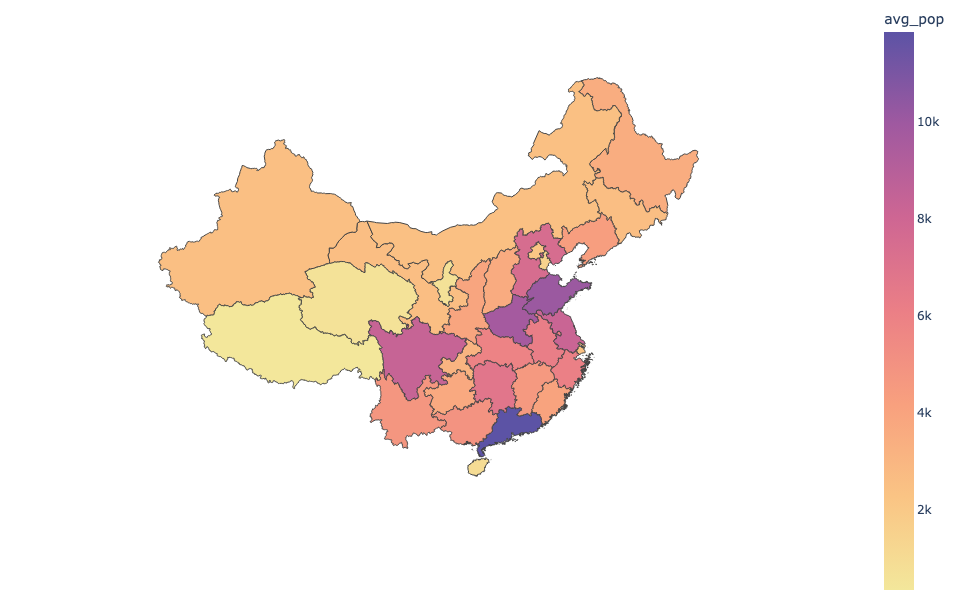

912

In [36]:
# Simplify the geometry to reduce complexity
china_shapefile['geometry'] = china_shapefile['geometry'].simplify(tolerance=0.01)

# Calculate the average population for each region and assign the new column name
avg_population = pop.groupby('Region')['total_pop'].mean().reset_index(name='avg_pop')

# Merge with the shapefile data
merged = china_shapefile.merge(avg_population, left_on='name_1', right_on='Region')

# Convert to JSON for Plotly
json_data = merged.geometry.to_json()

# Plot
geojson_data = json.loads(json_data)
fig = px.choropleth(merged, 
                    geojson=geojson_data, 
                    locations=merged.index, 
                    color='avg_pop',
                    hover_name='name_1',
                    projection='mercator',
                   color_continuous_scale=px.colors.sequential.Sunset)

fig.update_layout(width=990, height=600)
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Clean up memory
del china_shapefile, merged, json_data, geojson_data
gc.collect()

We then select some major regions and regions with relatively high populations and plot the trend of children and elderly dependency ratios from 2016 to 2022 in these regions.

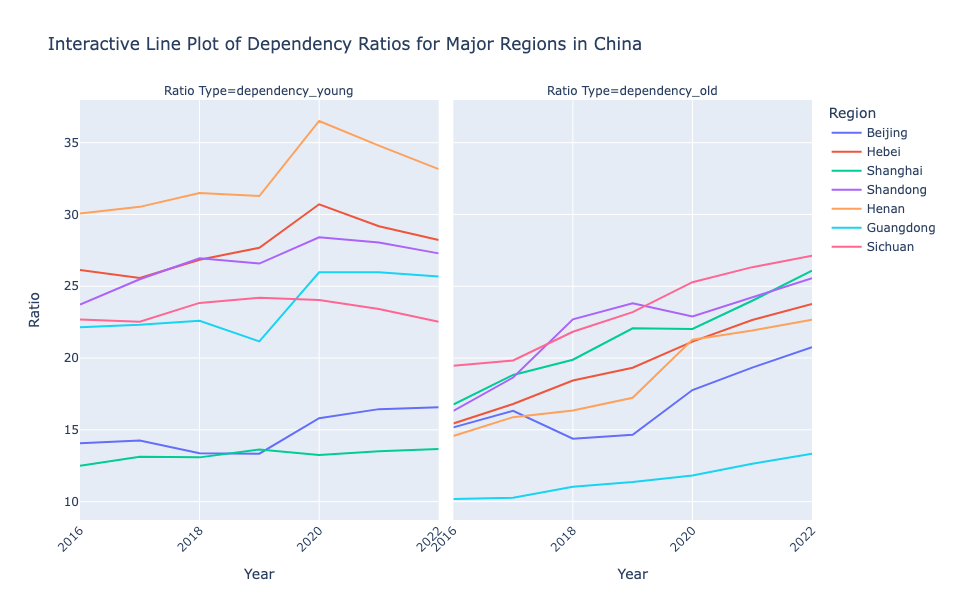

In [37]:
# Melt the Data for Interactive Plot
melted_pop = pop.melt(id_vars=['Year', 'Region'], value_vars=['dependency_young', 'dependency_old'],
                        var_name='Ratio Type', value_name='Ratio')

# Interactive Line Plot for major regions
selected_regions = ['Beijing', 'Shanghai', 'Guangdong', 'Sichuan', 'Shandong', 'Henan', 'Hebei']
filtered_pop = melted_pop[melted_pop['Region'].isin(selected_regions)]

# Create the interactive line plot
fig = px.line(filtered_pop, x="Year", y="Ratio", color='Region', line_group='Region',
              facet_col='Ratio Type', facet_col_wrap=2, 
              title='Interactive Line Plot of Dependency Ratios for Major Regions in China')

# Display plot
fig.update_layout(
    width=1000,
    height=600, 
    hovermode='x',
)

for axis in fig.layout:
    if axis.startswith('xaxis'):
        fig.layout[axis].update(tickangle=-45)

fig.show()

From this visualization of children and elder dependency ratio across China provinces, a consistent upward trend is observed in the elderly dependency ratio for all provinces. However, the trends in children dependency ratios differ among provinces. Notably, Shanghai exhibits a relatively stable, horizontal trend, while Hebei's ratio undergoes significant fluctuations over the years. More specifically, looking at children dependency ratio trend, except Beijing and Shanghai, all other provinces encounter an increasing ratio before 2020 and all starts to decrease after 2020. 

### Modelling

In [38]:
# We drop the natural growth rate because it can be directly calculated using the total population and birth and death rate.
# Including it might be redundant.
pop_model = pop.drop('natural_growth', axis=1)

unwanted = ['Year', 'Region', 'policy']
columns_log = pop_model.columns.drop(unwanted)

# transform data to its log from
for col in columns_log:
    if all(pop_model[col]) > 0:
        pop_model['ln_' + col] = np.log(pop_model[col])
        pop_model = pop_model.drop(col, axis=1)

pop_model.head()

Year          Region  policy  ln_total_pop  ln_urban_pop  \
0  2022         Beijing       1      7.688913      7.556428   
1  2022         Tianjin       1      7.217443      7.056175   
2  2022           Hebei       1      8.911934      8.428362   
3  2022          Shanxi       1      8.155075      7.707962   
4  2022  Inner Mongolia       1      7.783641      7.406711   

   ln_urban_proportion  ln_rural_pop  ln_rural_proportion  ln_birth  ln_death  \
0             4.472438      5.602119             2.520113  1.735189  1.743969   
1             4.443945      5.313206             2.700690  1.558145  1.860975   
2             4.121473      7.953318             3.646755  1.806648  2.054124   
3             4.158258      7.134891             3.584629  1.909543  2.045109   
4             4.228293      6.625392             3.446808  1.719189  2.057963   

   ln_sex_ratio  ln_never_married  ln_dependency_young  ln_dependency_old  \
0      4.646120          3.047376             2.807594           3.033028   
1      4.654056          2.915606             2.918311           3.189653   
2      4.592794          2.805782             3.340031           3.168424   
3      4.647942          2.928524             3.090588           3.028199   
4      4.645448          2.756840             2.915064           3.015535   

   ln_Illiteracy     ln_GRP  ln_unemployment    ln_CPI  
0      -0.174353  10.636117         3.594569  4.623010  
1       0.500775   9.699613         3.234749  4.623992  
2       0.779325  10.654205         3.020425  4.623010  
3       0.548121  10.152010         2.990720  4.625953  
4       1.321756  10.050121         3.367296  4.623010

### Splitting data

Since our analysis focuses on the impact of the Three-Child Policy, which was implemented in 2021, we need to ensure that the models can capture the average effect of the policy implementation on the dependency ratio. Therefore, we need to split the data so that both the training and testing samples include pre- and post-policy data.

Since variables are on different scales, we need to standardize the data.

In [39]:
# Selecting relevant columns
features = ['ln_total_pop', 'ln_urban_pop', 'ln_rural_pop', 'ln_birth', 
            'ln_death','ln_sex_ratio', 'ln_never_married','ln_Illiteracy', 
            'ln_GRP', 'ln_unemployment', 'ln_CPI']

In [40]:
# Standardize the input features for the analysis
scaler = StandardScaler()
pop_model[features] = scaler.fit_transform(pop_model[features])

In [41]:
# Split the data
train_set, test_set = train_test_split(pop_model, test_size=0.4, stratify=pop_model['policy'], random_state=42)

Comparing observations in the training and testing sample.

In [42]:
# Verifying the split
split_verification = {
    "Overall": pop_model['policy'].value_counts(normalize=True),
    "Training set": train_set['policy'].value_counts(normalize=True),
    "Testing set": test_set['policy'].value_counts(normalize=True)
}

split_verification_df = pd.DataFrame(split_verification)
split_verification_df

Overall  Training set  Testing set
0  0.714286      0.715385     0.712644
1  0.285714      0.284615     0.287356

In [43]:
# Separating the independent and dependent variables
X_train_children = train_set.drop(['ln_dependency_young', 'ln_dependency_old', 'Year', 'Region'], axis=1)
y_train_children = train_set['ln_dependency_young']
X_test_children = test_set.drop(['ln_dependency_young', 'ln_dependency_old', 'Year', 'Region'], axis=1)
y_test_children = test_set['ln_dependency_young']

X_train_elderly = train_set.drop(['ln_dependency_young', 'ln_dependency_old', 'Year', 'Region'], axis=1)
y_train_elderly = train_set['ln_dependency_old']
X_test_elderly = test_set.drop(['ln_dependency_young', 'ln_dependency_old', 'Year', 'Region'], axis=1)
y_test_elderly = test_set['ln_dependency_old']

### Linear Regression

##### For Children Dependency Ratio:

In [44]:
# Fit the OLS model for Children Dependency Ratio
model_ols_children = sm.OLS(y_train_children, X_train_children).fit()
# Output the summary of the models
model_ols_children.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     ln_dependency_young   R-squared (uncentered):                   0.998
Model:                             OLS   Adj. R-squared (uncentered):              0.998
Method:                  Least Squares   F-statistic:                              4723.
Date:                 Mon, 18 Dec 2023   Prob (F-statistic):                   9.61e-153
Time:                         01:55:37   Log-Likelihood:                          78.059
No. Observations:                  130   AIC:                                     -128.1
Df Residuals:                      116   BIC:                                     -87.97
Df Model:                           14                                                  
Covariance Type:             nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
policy                  0.3741      0.055      6.803      0.000       0.265       0.483
ln_total_pop            1.2893      1.600      0.806      0.422      -1.880       4.459
ln_urban_pop            4.9684     12.197      0.407      0.684     -19.189      29.125
ln_urban_proportion    -5.7409     13.595     -0.422      0.674     -32.667      21.185
ln_rural_pop           -6.4453     14.220     -0.453      0.651     -34.610      21.719
ln_rural_proportion     7.4092     15.542      0.477      0.634     -23.373      38.191
ln_birth                0.1534      0.026      5.813      0.000       0.101       0.206
ln_death               -0.0821      0.020     -4.163      0.000      -0.121      -0.043
ln_sex_ratio           -0.0122      0.016     -0.754      0.452      -0.044       0.020
ln_never_married        0.0005      0.020      0.026      0.979      -0.039       0.040
ln_Illiteracy          -0.0313      0.027     -1.142      0.256      -0.085       0.023
ln_GRP                  0.0297      0.082      0.362      0.718      -0.133       0.192
ln_unemployment        -0.0520      0.031     -1.653      0.101      -0.114       0.010
ln_CPI                  0.0460      0.015      3.168      0.002       0.017       0.075
==============================================================================
Omnibus:                        1.556   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.459   Jarque-Bera (JB):                1.368
Skew:                           0.101   Prob(JB):                        0.505
Kurtosis:                       2.540   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### For Elderly Dependency Ratio:

In [53]:
# Fit the OLS model for Elderly Dependency Ratio
model_ols_elderly = sm.OLS(y_train_elderly, X_train_elderly).fit()

# Output the summary of the models
model_ols_elderly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      ln_dependency_old   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              4701.
Date:                Mon, 18 Dec 2023   Prob (F-statistic):                   1.26e-152
Time:                        01:47:05   Log-Likelihood:                          92.700
No. Observations:                 130   AIC:                                     -157.4
Df Residuals:                     116   BIC:                                     -117.3
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
policy                  0.0979      0.049      1.993      0.049       0.001       0.195
ln_total_pop            2.0949      1.430      1.465      0.146      -0.737       4.927
ln_urban_pop            9.0055     10.898      0.826      0.410     -12.579      30.589
ln_urban_proportion   -10.0845     12.147     -0.830      0.408     -34.143      13.974
ln_rural_pop          -11.4619     12.705     -0.902      0.369     -36.627      13.703
ln_rural_proportion    12.3069     13.886      0.886      0.377     -15.196      39.810
ln_birth               -0.0602      0.024     -2.554      0.012      -0.107      -0.014
ln_death                0.1043      0.018      5.916      0.000       0.069       0.139
ln_sex_ratio           -0.0376      0.014     -2.610      0.010      -0.066      -0.009
ln_never_married       -0.0460      0.018     -2.598      0.011      -0.081      -0.011
ln_Illiteracy           0.0260      0.024      1.063      0.290      -0.022       0.074
ln_GRP                 -0.0061      0.073     -0.083      0.934      -0.151       0.139
ln_unemployment         0.0455      0.028      1.620      0.108      -0.010       0.101
ln_CPI                  0.0440      0.013      3.399      0.001       0.018       0.070
==============================================================================
Omnibus:                        0.062   Durbin-Watson:                   1.690
Prob(Omnibus):                  0.970   Jarque-Bera (JB):                0.209
Skew:                           0.015   Prob(JB):                        0.901
Kurtosis:                       2.806   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The coefficients above suggest that the Three-Child policy would have a positive impact on both the children's dependency rate (0.3807) and the elderly dependency rate (0.0981). These impacts are significant at the 5% significance level.

In addition, the OLS regressions suggest that features such as GRP have less impact on the dependency ratio due to their high p-values (0.718 for children dependency and 0.934 for elderly dependency). A high p-value suggests that the effect of the variable on the dependent variable is not statistically significant at the chosen significance level of 10%. This could be a reason to exclude the variable, especially if you're focusing on identifying factors that have a statistically significant impact on the dependent variable. 

Specifically, for children dependency ratio, variables that are statistically significant, which means their p value are less than 0.05 are policy, birth rate, death rate, and CPI. We could conclude these variables have significant impacts on children dependency ratio. Similarly, policy, birth rate, death rate, sex ratio, never married rate and CPI are statistically significant and they all have impacts on elderly dependency ratio. 

We will now fit the model on the test set and calculate the mean-squared error:

In [46]:
# Predict on the test set for Children Dependency Ratio
predictions_children_fit = model_ols_children.predict(X_test_children)
# Predict on the test set for Elderly Dependency Ratio
predictions_elderly_fit = model_ols_elderly.predict(X_test_elderly)

# Calculate MSE for both models
mse_ols_children = metrics.mean_squared_error(y_test_children, predictions_children_fit)
mse_ols_elderly = metrics.mean_squared_error(y_test_elderly, predictions_elderly_fit)

# Print Mean Squared Errors
print({"mse_ols (Children)": mse_ols_children, "mse_ols (Elderly)": mse_ols_elderly})

{'mse_ols (Children)': 0.02340437998908505, 'mse_ols (Elderly)': 0.02100262700492962}


Applying Ordinary Least Squares, we obtained a mean squared error of 0.0234044 for the Children Dependency Ratio and a mean squared error of 0.0210026 for the Elderly Dependency Ratio. 

### Lasso Regression

Now, we apply the Lasso regression method to our dataset. 

In addition, we use cross-validation to choose the best alpha value for Lasso regression.

In [47]:
alphas = np.logspace(-4, 1, 100)

# Apply cross-validation
lasso_cv_children = linear_model.LassoCV(alphas=alphas, cv=5).fit(X_train_children, y_train_children)
lasso_cv_elderly = linear_model.LassoCV(alphas=alphas, cv=5).fit(X_train_elderly, y_train_elderly)

# Find the optimal alpha for Children Dependency Ratio
optimal_alpha_children = lasso_cv_children.alpha_
optimal_alpha_elderly = lasso_cv_elderly.alpha_

# Print the optimal alpha
print({"optimal alpha (Children)": optimal_alpha_children, "optimal alpha (Elderly)": optimal_alpha_elderly})

{'optimal alpha (Children)': 0.00031992671377973844, 'optimal alpha (Elderly)': 0.0016297508346206436}


Now we compute the impact of the policy on both children and elderly dependency rate:

In [48]:
# Fit the Lasso model with the optimal alpha 
lasso_optimal_children = linear_model.Lasso(alpha=optimal_alpha_children).fit(X_train_children, y_train_children)
lasso_optimal_elderly = linear_model.Lasso(alpha=optimal_alpha_elderly).fit(X_train_elderly, y_train_elderly)

# Extracting coefficients for the 'policy' variable from the Lasso models
policy_coefficient_children = lasso_optimal_children.coef_[X_train_children.columns.get_loc('policy')]
policy_coefficient_elderly = lasso_optimal_elderly.coef_[X_train_elderly.columns.get_loc('policy')]

# Print the impact of the policy:
policy_coefficient_children, policy_coefficient_elderly
print({"effect_lasso (Children)": policy_coefficient_children, "effect_lasso (Elderly)": policy_coefficient_elderly})

{'effect_lasso (Children)': 0.3750926696842528, 'effect_lasso (Elderly)': 0.062391426592243615}


The coefficients above suggest that the Three-Child policy would have a positive impact on both the children's dependency rate (0.375093) and the elderly dependency rate (0.062391).

Then, we fit the model to the test set and compute the mean squared error:

In [49]:
# Predict on the test set 
predictions_optimal_lasso_children = lasso_optimal_children.predict(X_test_children)
predictions_optimal_lasso_elderly = lasso_optimal_elderly.predict(X_test_elderly)

# Calculating MSE for Children Dependency Ratio with optimal alpha
mse_optimal_lasso_children = metrics.mean_squared_error(y_test_children, predictions_optimal_lasso_children)
mse_optimal_lasso_elderly = metrics.mean_squared_error(y_test_elderly, predictions_optimal_lasso_elderly)

# Print Mean Squared Errors
print({"mse_lasso (Children)": mse_optimal_lasso_children, "mse_lasso (Elderly)": mse_optimal_lasso_elderly})

{'mse_lasso (Children)': 0.02366592255136508, 'mse_lasso (Elderly)': 0.020901755471031302}


Applying Lasso Regression, we obtained a mean squared error of 0.023666 for the Children Dependency Ratio and a mean squared error of 0.020902 for the Elderly Dependency Ratio.

We then plot the Lasso path:

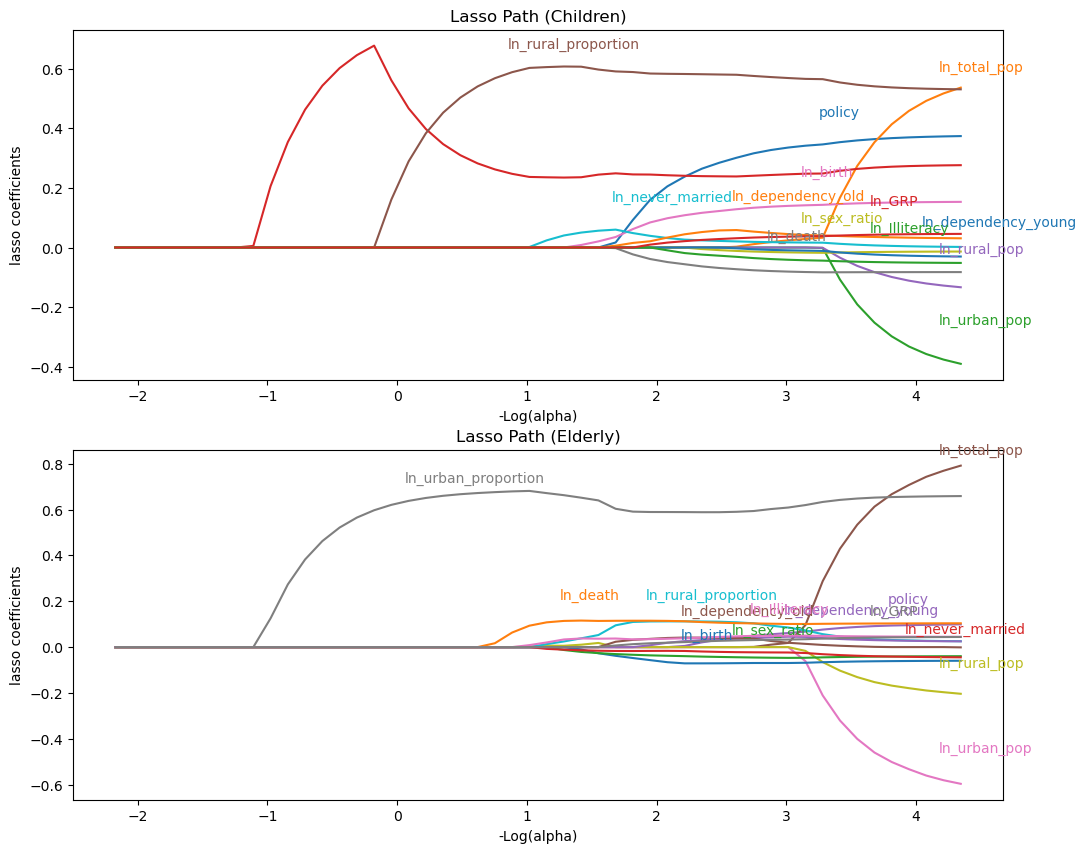

In [50]:
alphas = np.exp(np.linspace(5, -10, 50))
alphas_child, coefs_lasso_child, _ = linear_model.lasso_path(X_train_children, y_train_children,
                                                             alphas=alphas, max_iter=10000)
alphas_elderly, coefs_lasso_elderly, _ = linear_model.lasso_path(X_train_elderly, y_train_elderly, 
                                                             alphas=alphas, max_iter=10000)

colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd', '#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf']
color_cycle = cycle(colors)

log_alphas = -np.log10(alphas)

pop1 = pop_model.drop(['Year', 'Region'], axis=1)
feature_names = pop1.columns

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

for coef_l, c, name in zip(coefs_lasso_child, color_cycle, list(feature_names)):
   ax1.plot(log_alphas, coef_l, c=c)
   ax1.set_xlabel('-Log(alpha)')
   ax1.set_ylabel('lasso coefficients')
   ax1.set_title('Lasso Path (Children)')
   ax1.axis('tight')
   maxabs = np.max(np.abs(coef_l))
   i = [idx for idx in range(len(coef_l)) if abs(coef_l[idx]) >= (0.9*maxabs)][0]
   xnote = log_alphas[i]
   ynote = coef_l[i]
   ax1.annotate(name, xy=(xnote+0.1, ynote+0.1), color=c)
    
for coef_l, c, name in zip(coefs_lasso_elderly, color_cycle, list(feature_names)):
   ax2.plot(log_alphas, coef_l, c=c)
   ax2.set_xlabel('-Log(alpha)')
   ax2.set_ylabel('lasso coefficients')
   ax2.set_title('Lasso Path (Elderly)')
   ax2.axis('tight')
   maxabs = np.max(np.abs(coef_l))
   i = [idx for idx in range(len(coef_l)) if abs(coef_l[idx]) >= (0.9*maxabs)][0]
   xnote = log_alphas[i]
   ynote = coef_l[i]
   ax2.annotate(name, xy=(xnote+0.1, ynote+0.1), color=c)

Looking at the lasso path we got above, we can conclude that for `children dependency rate`, `ln_GRP`,`policy`, `ln_total_pop`, `ln_urban_pop`, and `ln_never_married` are less relevant to the model. For `elderly dependency rate`, `ln_total_pop`, `ln_urban`, `ln_rural_proportion`, `ln_rural_pop` are less relevant to the model. These variables changed drastically that shrunk rapidly to zero as the regularization strengths increases(moving from right to left) which means these three variables are very sensitive. So these are not a good predictor for our model.

Similarly, for `elderly dependency rate`, `urban population proportion`, `total population`, `urban population` and `rural population` are are not strong and significant, and they are not a good predictor for our model. 

In contrast, the remaining variables demonstrate relative relevance as they exhibit less sensitivity and do not fluctuate significantly with stronger regularization.

### Random Forest

In [51]:
# Fit the Random Forest model
rf_model_children = RandomForestRegressor(random_state=123).fit(X_train_children, y_train_children)
rf_model_elderly = RandomForestRegressor(random_state=123).fit(X_train_elderly, y_train_elderly)

# Predict on the test set
rf_predictions_children = rf_model_children.predict(X_test_children)
rf_predictions_elderly = rf_model_elderly.predict(X_test_elderly)

# Extract feature importances
feature_importance_children = rf_model_children.feature_importances_[X_train_children.columns.get_loc('policy')]
feature_importance_elderly = rf_model_elderly.feature_importances_[X_train_elderly.columns.get_loc('policy')]

# Calculate MSE for both models
mse_rf_children = metrics.mean_squared_error(y_test_children, rf_predictions_children)
mse_rf_elderly = metrics.mean_squared_error(y_test_elderly, rf_predictions_elderly)

# Print the impact of the policy:
print({"effect_rf (Children)": feature_importance_children, "effect_rf (Elderly)": feature_importance_elderly})

# Print Mean Squared Errors
print({"mse_rf (Children)": mse_rf_children, "mse_rf (Elderly)": mse_rf_elderly})

{'effect_rf (Children)': 0.016592455846170376, 'effect_rf (Elderly)': 0.013353013204658055}
{'mse_rf (Children)': 0.02365348230540743, 'mse_rf (Elderly)': 0.013866325694329856}


The coefficients above suggest that the Three-Child policy would have a positive impact on both the children's dependency rate (0.016592) and the elderly dependency rate (0.013353). 

Applying Random Forest, we obtained a mean squared error of 0.023666 for the Children Dependency Ratio and a mean squared error of 0.013353 for the Elderly Dependency Ratio.

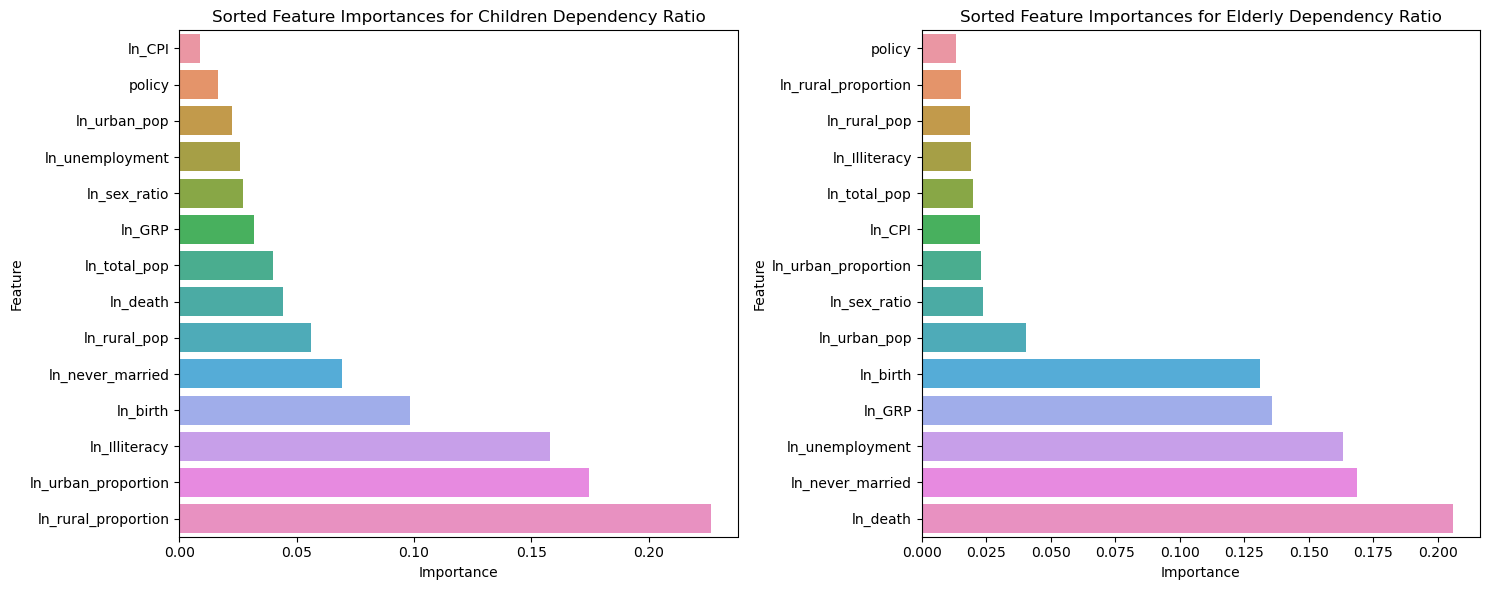

In [52]:
# Sorting the feature importances for better visualization
sorted_indices_children = rf_model_children.feature_importances_.argsort()
sorted_indices_elderly = rf_model_elderly.feature_importances_.argsort()

# Creating subplots to display the sorted feature importances side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Sorted feature importances for Children Dependency Ratio
sns.barplot(ax=axes[0], x=rf_model_children.feature_importances_[sorted_indices_children], y=X_test_children.columns[sorted_indices_children])
axes[0].set_title('Sorted Feature Importances for Children Dependency Ratio')
axes[0].set_xlabel('Importance')
axes[0].set_ylabel('Feature')

# Sorted feature importances for Elderly Dependency Ratio
sns.barplot(ax=axes[1], x=rf_model_elderly.feature_importances_[sorted_indices_elderly], y=X_test_elderly.columns[sorted_indices_elderly])
axes[1].set_title('Sorted Feature Importances for Elderly Dependency Ratio')
axes[1].set_xlabel('Importance')
axes[1].set_ylabel('Feature')

plt.tight_layout()
plt.show()

These plots suggest that `ln_rural_proportion`, `ln_urban_proportion`, and `ln_illteracy` are relatively more influential features in predicting the `Children Dependency Rate`. `ln_death`, `ln_never_married`, and `ln_unemployment` are relatively more influential features in predicting the `Elderly Dependency Rate`.

In addition, the feature importance of `policy` is very small in both cases, this suggests that the Three-Child Policy might not exhibit a great impact on `Children Dependency Rate` and `Elderly Dependency Rate`.

In [53]:
#Compare mse of the 3 models --> accuracy

# create a summary table
mse_summary = pd.DataFrame({
    "Linear Regression": [mse_ols_children, mse_ols_elderly],
    "Lasso": [mse_optimal_lasso_children, mse_optimal_lasso_elderly],
    "Random Forest": [mse_rf_children, mse_rf_elderly]
}, index=["Children MSE", "Elderly MSE"])

mse_summary

Linear Regression     Lasso  Random Forest
Children MSE           0.023404  0.023666       0.023653
Elderly MSE            0.021003  0.020902       0.013866

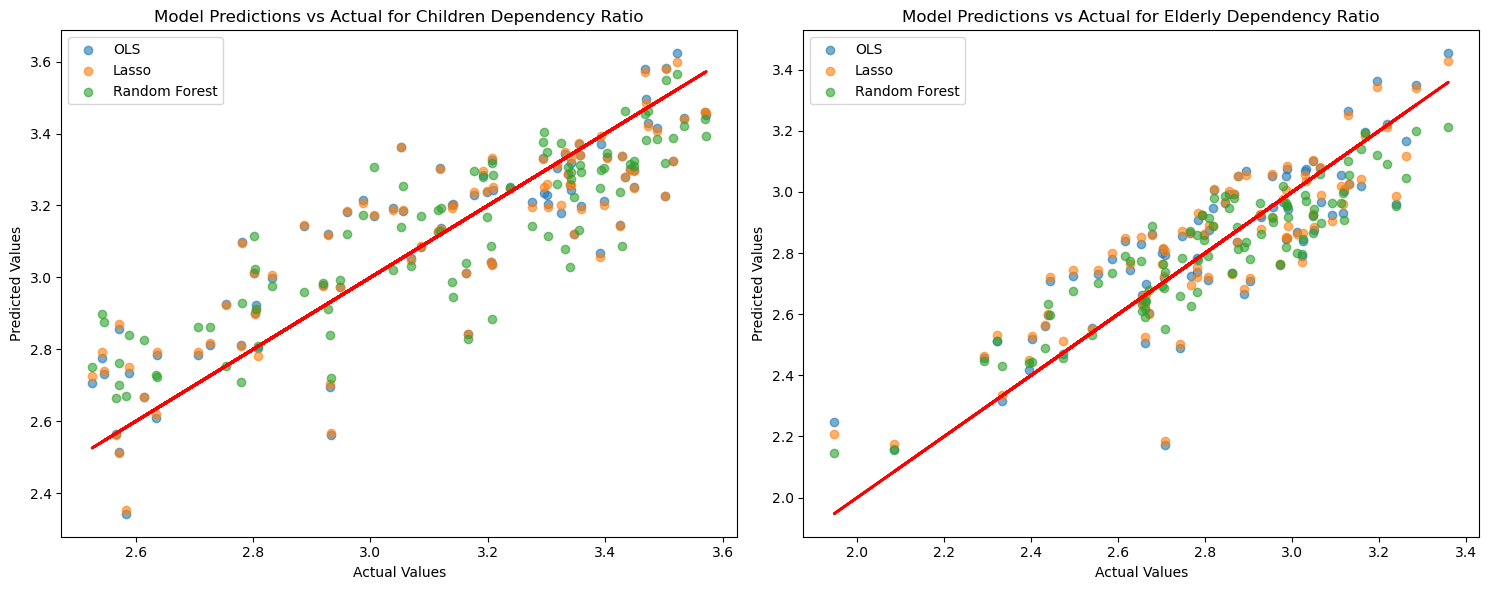

In [54]:
# Predictions from the OLS models
ols_predictions_children = model_ols_children.predict(X_test_children)
ols_predictions_elderly = model_ols_elderly.predict(X_test_elderly)

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot for Children Dependency Ratio
axes[0].scatter(y_test_children, ols_predictions_children, alpha=0.6, label='OLS')
axes[0].scatter(y_test_children, predictions_optimal_lasso_children, alpha=0.6, label='Lasso')
axes[0].scatter(y_test_children, rf_predictions_children, alpha=0.6, label='Random Forest')
axes[0].plot(y_test_children, y_test_children, color='red', linewidth=2)  
axes[0].set_title('Model Predictions vs Actual for Children Dependency Ratio')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].legend()

# Plot for Elderly Dependency Ratio
axes[1].scatter(y_test_elderly, ols_predictions_elderly, alpha=0.6, label='OLS')
axes[1].scatter(y_test_elderly, predictions_optimal_lasso_elderly, alpha=0.6, label='Lasso')
axes[1].scatter(y_test_elderly, rf_predictions_elderly, alpha=0.6, label='Random Forest')
axes[1].plot(y_test_elderly, y_test_elderly, color='red', linewidth=2) 
axes[1].set_title('Model Predictions vs Actual for Elderly Dependency Ratio')
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predicted Values')
axes[1].legend()

plt.tight_layout()
plt.show()

The linear fit on a graph helps to visually assess the direction and strength of the relationship between two variables.

### Conclusion

This project aims to analyze the impact of China's Third-Child Policy on children and elderly dependency rate and forecast future population growth. We assess three distinct methods: Ordinary Least Squares, Lasso Regression, and Random Forest, with the objective of identifying the most accurate prediction model. 

As noticed, the result from OLS, Lasso, and Random Forest somehow contradict to each other. For example, Lasso Regression suggests never married ratio is less relevant whereas Random Forest indicates that never married ratio has the relatively higher feature importance on predicting elderly dependency ratio. To get a better conclusion, we need to look at the size of mean squared error generated by each model. From the above MSE summary table, we can see that the Random Forest method provides relatively smaller value of MSE than OLS and Lasso. In addition, the scatter plots above reinforce this conclusion, as the Random Forest predictions appear to align more closely with the red line, indicating a better fit to the actual values. Therefore, we can conclude that Random Forest would be an appropriate method for our analysis.

In terms of the policy impact, all three models show relatively small impact, indicating that the Three-Child Policy is not exhibiting a salient impact so far. The Ordinary Least Squares model gives a 0.3741 policy coefficient on children dependency ratio and 0.0979 policy coefficient on elderly dependency ratio. Lasso Regression has similar size of coefficient on children dependency ratio and elderly dependency ratio as OLS, which are 0.3741 and 0.0624. As we mentioned before, Random Forest is relative more appropriate to use for our analysis, Random Forest results in a much smaller coefficient: 0.001659 and 0.01335 for children and elderly dependency ratio which affirms the conclusion that the policy exerts minimal influence on the dependency ratio.

### Limitation

Following the initiation of the Three-Child Policy in China on May 31, 2021, data for analysis is available solely for the period spanning 2021 to 2022, thereby excluding the entirety of 2023. The constrained temporal scope of this dataset, spanning a mere one-year interval, yields a restricted pool of observational data. Consequently, the inherent limitation of a diminished sample size compromises the precision of discerning the impact of the Three-Child Policy on China's population growth when compared to studies endowed with more extensive datasets. The limitation would also be the reason of what we conclude from conclusion that the policy has negligible impact on dependency ratio since it has only been one year, it mak